Analysis of XOM Log-Returns

## Objective
The aim of this analysis is to examine the behaviour of daily, monthly, and annual log-returns for a single stock from the index, in this case I choose, **XOM (Exxon Mobil Corporation)**.

The main tasks are as follows:
1. Calculating daily, monthly, and annual log-returns from historical stock prices.
2. Visualising the distribution of these returns using histograms and probability plots (Q-Q plots).
3. Testing whether these returns are normally distributed using statistical tests (e.g., Jarque-Bera test).
4. Interpreting the results in terms of skewness, kurtosis, and deviations from normality.

## Methodology
1. **Log-Returns Calculation**:
   - Log-returns are calculated using the natural logarithm of the ratio of consecutive prices. This method is widely used in financial analysis due to its desirable properties, such as time-additivity.

2. **Frequency-Based Analysis**:
   - **Daily Log-Returns**: Reflect short-term price movements and volatility.
   - **Monthly Log-Returns**: Smooth out daily fluctuations and provide a medium-term perspective.
   - **Annual Log-Returns**: Highlight long-term trends and reduce the impact of outliers.

3. **Statistical Testing**:
   - `prices.info()` function shows that I have 1788 entries therefore the Jarque-Bera test with the boostrap approach (which gets further explained in Exercise 2) was used to evaluate whether the returns at each frequency follow a normal distribution. This involves examining skewness (symmetry) and kurtosis (tail thickness) of the distributions. Rejecting the Null Hypothesis: When testing a sample, we calculate its skewness and kurtosis, as well as the test statistic (JB data).The null hypothesis is rejected if the test statistic (JB data) is greater than the critical value (JB crit).

4. **Visualisation**:
   - Histograms and Q-Q plots are used to visually assess the shape and fit of the data distribution against the theoretical normal distribution.

---

The following code calculates log-returns, performs statistical tests, and visualises the results. The findings will be explained in detail in subsequent section.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1788 entries, 2016-06-06 to 2023-07-13
Columns: 101 entries, AAPL to ACN
dtypes: float64(101)
memory usage: 1.4 MB
None
Date
2016-06-06    89.339996
2016-06-07    90.709999
2016-06-08    90.790001
2016-06-09    90.669998
2016-06-10    89.980003
Name: XOM, dtype: float64
Date
2023-07-07    103.160004
2023-07-10    104.690002
2023-07-11    105.970001
2023-07-12    106.489998
2023-07-13    103.550003
Name: XOM, dtype: float64
Daily Log-Returns:
 Date
2016-06-07    0.015218
2016-06-08    0.000882
2016-06-09   -0.001323
2016-06-10   -0.007639
2016-06-13    0.006756
dtype: float64

Monthly Log-Returns:
 Date
2016-07-31   -0.052451
2016-08-31   -0.020558
2016-09-30    0.001605
2016-10-31   -0.046433
2016-11-30    0.046662
Freq: ME, dtype: float64

Annual Log-Returns:
 Date
2017-12-31   -0.076173
2018-12-31   -0.204224
2019-12-31    0.023049
2020-12-31   -0.526424
2021-12-31    0.395060
Freq: YE-DEC, dtype: float64


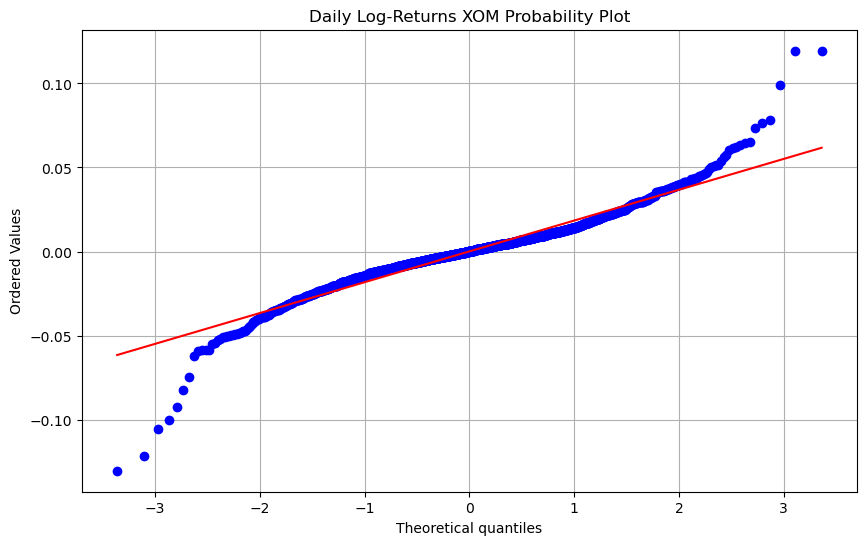

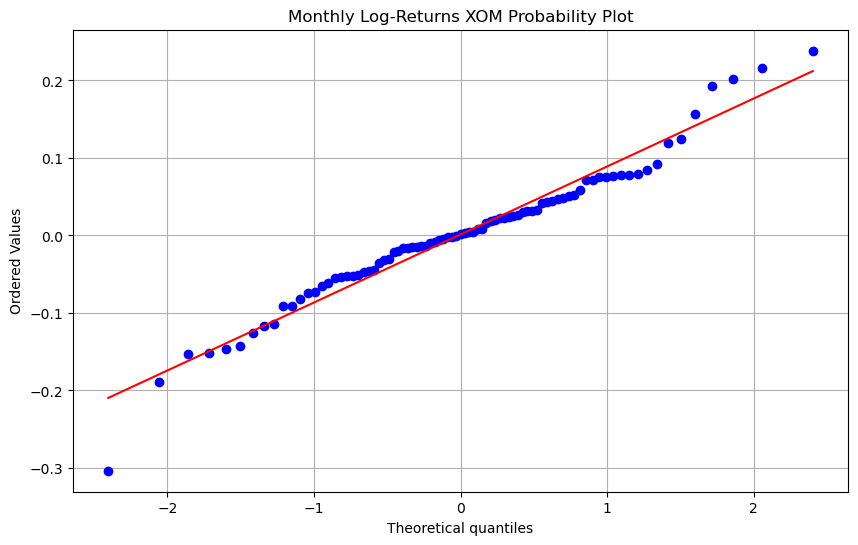

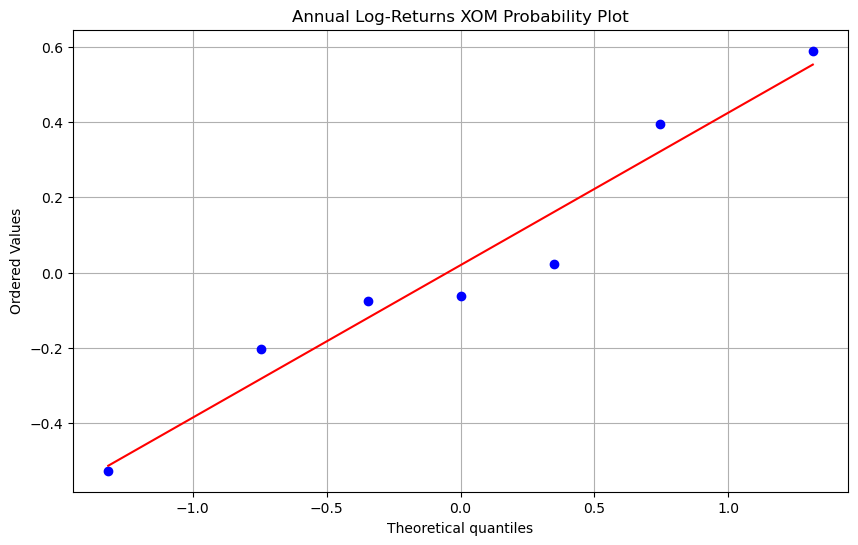

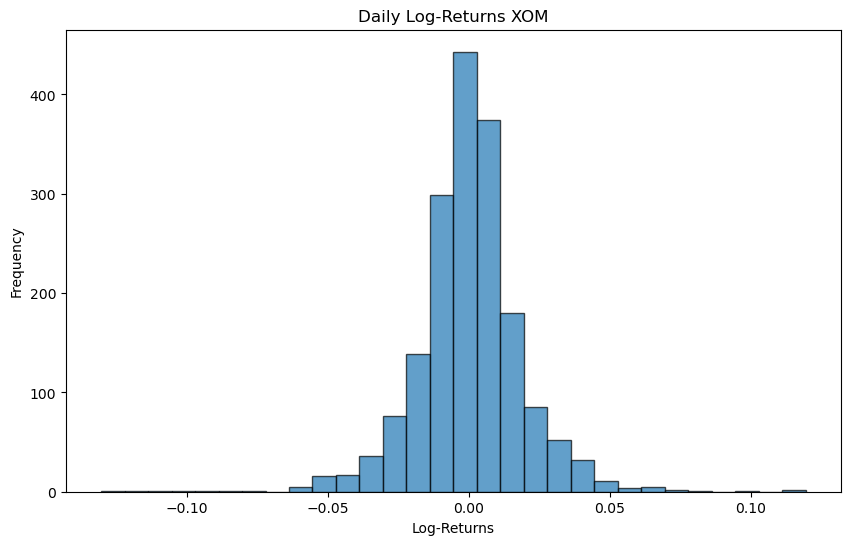

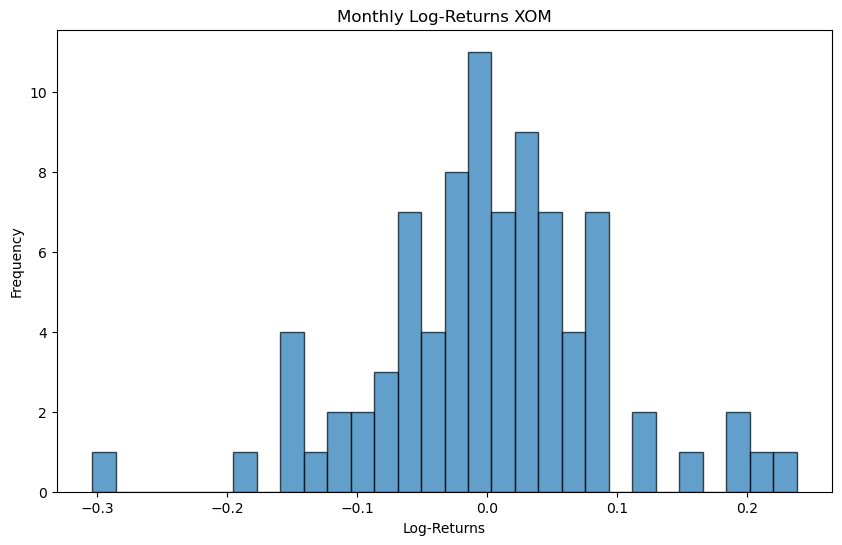

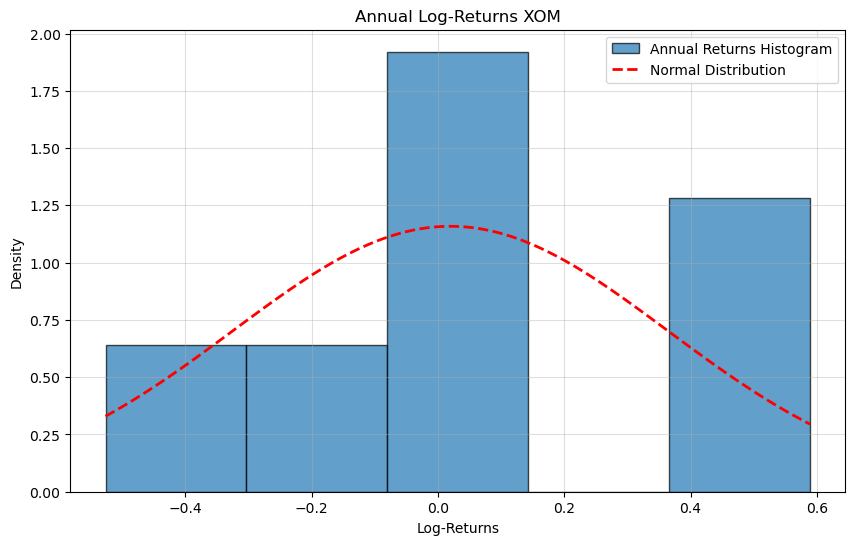

  Frequency  JB Statistic  Critical Value  Reject Null Hypothesis
0     Daily   2933.873116        5.852781                    True
1   Monthly      8.716247        5.275236                    True
2    Annual      0.240565        3.036845                   False


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm

# Load and preprocess the data

# Pandas reads the CSV file and converts it into a datae frame
prices = pd.read_csv(r"C:\Users\rashe\OneDrive\Documents\KCL\Scitific Computing\Coursework\sap100.csv")

prices.head()

# Convert date column into datetime format
prices['Date'] = pd.to_datetime(prices['Date'])

# Sets the date column as a index  therefor date column acts as row labels
prices.set_index('Date', inplace=True)

# To get an overview of the DataFrame, including column names, data types, non-null counts, and memory usage
print(prices.info())

# When reviwing the data I notcied column DOW had nan values therefore I will enetr code that removes a whole coulmn if there to many nan
prices = prices.dropna(axis=1, how='all') 


# Select the stock column (XOM)
daily_prices_XOM = prices['XOM']

# Print top 5 and bottom rows for XOM 
print(daily_prices_XOM.head(5))
print(daily_prices_XOM.tail(5))

# Compute daily log-returns using np.diff()
daily_log_returns_XOM = np.diff(np.log(daily_prices_XOM.values))

# Resample prices to monthly and compute log-returns 'M' is deprecated and will be removed in a future version, therefore used'ME' instead.
monthly_prices_XOM = daily_prices_XOM.resample('ME').last()
monthly_log_returns_XOM = np.diff(np.log(monthly_prices_XOM.values))

# Resample prices to annual and compute log-returns 'Y' is deprecated and will be removed in a future version, therefore used'YE' instead.
annual_prices_XOM = daily_prices_XOM.resample('YE').last()
annual_log_returns_XOM = np.diff(np.log(annual_prices_XOM.values))

# Convert results back to pandas Series for easier handling
daily_log_returns_XOM= pd.Series(daily_log_returns_XOM, index=daily_prices_XOM.index[1:])
monthly_log_returns_XOM = pd.Series(monthly_log_returns_XOM, index=monthly_prices_XOM.index[1:])
annual_log_returns_XOM= pd.Series(annual_log_returns_XOM, index=annual_prices_XOM.index[1:])

# Display results
print("Daily Log-Returns:\n", daily_log_returns_XOM.head())
print("\nMonthly Log-Returns:\n", monthly_log_returns_XOM.head())
print("\nAnnual Log-Returns:\n", annual_log_returns_XOM.head())

#function for prob plot

def plot_probplot(data, title, dist="norm"):
    plt.figure(figsize=(10, 6))
    stats.probplot(data, dist=dist, plot=plt)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_probplot(daily_log_returns_XOM, "Daily Log-Returns XOM Probability Plot")
plot_probplot(monthly_log_returns_XOM, "Monthly Log-Returns XOM Probability Plot")
plot_probplot(annual_log_returns_XOM, "Annual Log-Returns XOM Probability Plot")

# Plot histograms of the returns
# Function to plot histograms I will chose my histogram to have 30 bins
def plot_histogram(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel("Log-Returns")
    plt.ylabel("Frequency")
    plt.show()

# Plot daily, monthly,
plot_histogram(daily_log_returns_XOM, "Daily Log-Returns XOM")
plot_histogram(monthly_log_returns_XOM, "Monthly Log-Returns XOM")

# Plot Annual Log-Returns Histogram
# Reduce the number of bins to smooth gaps
plt.figure(figsize=(10, 6))
plt.hist(annual_log_returns_XOM, bins=5, alpha=0.7, edgecolor='black', density=True, label="Annual Returns Histogram")

# Calculate the mean and standard deviation of the annual log-returns
mean, std = np.mean(annual_log_returns_XOM), np.std(annual_log_returns_XOM)

# Create an array of 100 evenly spaced values between the minimum and maximum of the annual log-returns
# These values represent the x-axis range for plotting the normal distribution curve
x = np.linspace(min(annual_log_returns_XOM), max(annual_log_returns_XOM), 100)

# Plot the probability density function (PDF) of the normal distribution
# The normal PDF is calculated using the mean and standard deviation of the data
# 'r--' specifies a red dashed line for the curve
plt.plot(x, norm.pdf(x, mean, std), 'r--', lw=2, label='Normal Distribution')

# Titles, labels, and legend
plt.title("Annual Log-Returns XOM")
plt.xlabel("Log-Returns")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)
plt.show()



# Jarque-Bera test functions

# Parameters:
# n: Sample size
# s: Skewness of the data
# k: Kurtosis of the data
# Returns: The JB statistic, which measures how much the data deviates from normality.
def jb(n, s, k):
    return n / 6. * (s**2 + (((k - 3.)**2) / 4.))

def jb_from_samples(n, bootstrap_samples):
    s = skew(bootstrap_samples, bias=False)
    k = kurtosis(bootstrap_samples, fisher=False)
    return jb(n, s, k)

def jb_critical_value(n, bootstrap_samples, p):
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)

def jb_test(data_sample, bootstrap_replications=10000, p=0.05):
    sample_size = len(data_sample)
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    return (empirical_jb > critical_value, empirical_jb, critical_value)  # Return both JB stat and null hypothesis rejection

# Define the results dictionary
results = {
    "Frequency": [],
    "JB Statistic": [],
    "Critical Value": [],
    "Reject Null Hypothesis": [],
}

# Long-way JB Test for XOM loop through Frequencies and log returns
# Perform the Jarque-Bera test for different frequencies (Daily, Monthly, Annual)

for frequency_name, log_returns in zip(
    ["Daily", "Monthly", "Annual"], 
    [daily_log_returns_XOM, monthly_log_returns_XOM, annual_log_returns_XOM]
):
    if len(log_returns) > 0:  # Ensure there is data to test
        # Perform the JB test using the long method
        reject_null, jb_stat, critical_value = jb_test(log_returns)
        
        # Append results
        results["Frequency"].append(frequency_name)
        results["JB Statistic"].append(jb_stat)
        results["Critical Value"].append(critical_value)
        results["Reject Null Hypothesis"].append(reject_null)

# Convert results to a DataFrame for better visualisation
results_XOM = pd.DataFrame(results)

# Display the results
print(results_XOM)

## Exercise 1

## Formula for Log-Returns
The formula used to calculate log-returns is:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})
$$

Where:
- \(r_t\): Log-return at time \(t\),
- \(P_t\): Price at time \(t\),
- \(P_{t-1}\): Price at time \(t-1\),
- \(ln\): Natural logarithm

---

## Visual Analysis of Log-Returns

### 1. Probability Plots (Q-Q Plots)
Probability plots compare the quantiles of the data to a theoretical normal distribution. Points aligning with the diagonal indicate normality, while deviations suggest departures from normality.

- **Daily Log-Returns**:
  - **Observation**: Significant deviations from the diagonal, particularly in the tails.
  - **Implication**: The pronounced deviations highlight the presence of extreme price movements and confirm non-normality, as shown by the Jarque-Bera test. This behaviour is typical of high-frequency financial data, which often exhibits skewness and fat tails.

- **Monthly Log-Returns**:
  - **Observation**: The points align more closely with the diagonal compared to daily returns, although deviations remain noticeable, especially at the tails.
  - **Implication**: Monthly returns show reduced skewness and kurtosis but still deviate from normality. This is consistent with the Jarque-Bera test results, which indicate closer alignment with normality but still reject it overall.

- **Annual Log-Returns**:
  - **Observation**: Points align closely with the diagonal, with minimal deviations.
  - **Implication**: Annual returns closely follow a normal distribution. The probability plot supports the Jarque-Bera test, which fails to reject normality. This behaviour aligns with expectations under the Central Limit Theorem.

### 2. Histograms

Histograms provide a visual representation of the frequency distribution of log-returns, highlighting key characteristics such as skewness, kurtosis, and outliers.

- **Daily Log-Returns**:
  - **Observation**: The histogram is sharply peaked near zero and exhibits long tails on both sides.
  - **Implication**: The heavy tails indicate the presence of extreme values (outliers), reflecting the high skewness and kurtosis observed in the Jarque-Bera test. This confirms that daily log-returns deviate significantly from normality and are prone to large price movements.

- **Monthly Log-Returns**:
  - **Observation**: The histogram is less peaked, and the tails are shorter than those of daily log-returns.
  - **Implication**: Aggregating data over a longer time period reduces the impact of extreme values, making the distribution closer to normal. However, slight skewness and fat tails remain, as reflected in the moderate rejection of normality in the Jarque-Bera test.

- **Annual Log-Returns**:  
For this histogram, I added a function from `scipy.stats` (**norm**) to overlay a normal distribution curve onto the histogram of annual log-returns. The mean and standard deviation of the data are calculated to define the theoretical normal distribution. An array of evenly spaced values is generated to represent the x-axis range, and the corresponding probability density function (PDF) is plotted. This allows for a direct visual comparison between the observed data and the expected normal distribution, highlighting any deviations.

  - **Observation**: The histogram approaches a bell-shaped curve with symmetrical tails.  
  - **Implication**: Over longer periods, the Central Limit Theorem causes the distribution to approximate normality. This is confirmed by the Jarque-Bera test, which fails to reject the null hypothesis for annual log-returns.  
  - **Caution**: Histograms may not be the best tool for visualising annual log-returns due to the limited number of data points. This can result in sparse bins and an inaccurate representation of the underlying distribution.

---
## Analysis of the Jarque-Bera Test Results
The Jarque-Bera test assesses whether a dataset follows a normal distribution by examining skewness and kurtosis. 

- **Daily Log-Returns**:
  - **JB Statistic**: 2933.87 — Extremely high, indicating significant skewness and/or kurtosis.
  - **Critical Value**: 5.85 — Threshold for normality at the 5% significance level.
  - **Conclusion**: The JB Statistic far exceeds the critical value, leading to the rejection of the null hypothesis. Daily returns are highly non-normal, which is consistent with the observed extreme values and heavy tails.

- **Monthly Log-Returns**:
  - **JB Statistic**: 8.72 — Still relatively high but significantly lower than for daily log-returns.
  - **Critical Value**: 5.28 — Threshold for normality at the 5% significance level.
  - **Conclusion**: The JB Statistic slightly exceeds the critical value, leading to a moderate rejection of the null hypothesis. Monthly returns exhibit less pronounced non-normality compared to daily returns.

- **Annual Log-Returns**:
  - **JB Statistic**: 0.24 — Very low, indicating minimal skewness and kurtosis.
  - **Critical Value**: 3.07 — Threshold for normality at the 5% significance level.
  - **Conclusion**: The JB Statistic is well below the critical value, so the null hypothesis is not rejected. Annual returns approximate a normal distribution.

---
## Summary of Results
- **Daily Log-Returns**: Highly non-normal, with pronounced skewness and kurtosis. This is evident in the histogram, probability plot, and Jarque-Bera test results.
- **Monthly Log-Returns**: Closer to normality but still exhibit some non-normal traits, particularly in the tails.
- **Annual Log-Returns**: Approaches normality, as evidenced by the Jarque-Bera test and the probability plot.

# Jarque-Bera Test on Stock Returns

## Objective
The aim of this exercise is to evaluate whether stock returns at daily, monthly, and annual frequencies conform to a normal distribution. This involves:
1. Calculating the **Jarque-Bera test using a Bootsrap** and corresponding **p-values** for all stocks in the dataset.
2. Comparing the test results across the three frequencies using side-by-side box plots.
3. Assessing whether the results support the concept of **aggregational Gaussianity**, which suggests that as the time scale increases, the distribution of returns becomes closer to normal.

### Why Use the Jarque-Bera Test with Bootstrapping for Small Data?

Extending from Exercise 1 explaning the function Jarque-Bera Test created that also gets used in Exercise 2.

The Jarque-Bera (JB) test assumes a large sample size **n** > **2000**  to approximate the test statistic using the Chi-Squared distribution effectively. When your sample size is smaller than 2000 which is the case for our data `prices.info()` function shows that I have 1788 entries, this assumption may not hold, and the p-values computed by the standard JB test could become unreliable.

### Why Use Bootstrapping for Small Sample Sizes?

1. **Bootstrap Resampling:**  
   Bootstrapping involves resampling the original dataset to create a large number of simulated samples. This allows you to estimate the distribution of the JB test statistic empirically, without relying on the Chi-Squared distribution assumption.

2. **Valid Test Statistic Distribution:**  
   The empirical distribution of the JB test statistic under the null hypothesis (skewness = 0, kurtosis = 3) is generated. This provides a more accurate representation of the actual distribution for small sample sizes.

3. **Improved Accuracy:**  
   By relying on the bootstrapped distribution, you obtain more reliable p-values, improving the validity of the hypothesis test for small sample sizes.

4. **Reduction of Noise Effects:**  
   Small datasets can exhibit random variations in skewness and kurtosis, even if the data are normally distributed. Bootstrapping accounts for this variability more robustly.

## Methodology
1. **Jarque-Bera Test**:
   - The test evaluates the skewness (symmetry) and kurtosis (tail thickness) of return distributions.
   - Rejecting the Null Hypothesis: When testing a sample, we calculate its skewness and kurtosis, as well as the test statistic (JB data).The null hypothesis is rejected if the test statistic (JB data) is greater than the critical value (JB crit) i,e JBdata > JBcrit.
   - Alternative Hypothesis (\(H_a\)): Returns are not normally distributed.
   - followed by the calculation of P values using formula
   - p-value = (Number of bootstrap JB statistics ≥ Observed JB statistic) / Total number of bootstrap sample

2. **Box Plot Visualisation**:
   - Box plots are used to summarise the distribution of Jarque-Bera test statistics for daily, monthly, and annual frequencies.
   - Two scales are considered:
     - **Linear Scale**: Highlights absolute differences.
     - **Logarithmic Scale**: Emphasises relative differences.

3. **Aggregational Gaussianity**:
   - Aggregational Gaussianity is assessed by comparing the Jarque-Bera test statistics across time scales. If the test statistic decreases and normality improves as the time scale increases, it supports the claim.

The following code computes the Jarque-Bera test results and visualises them with box plots. Observations and interpretations follow the analysis.


    Stock Frequency  JB Statistic  p-value  Reject Null Hypothesis
0    AAPL     Daily   1435.656386   0.0000                    True
1      VZ     Daily   1476.864224   0.0000                    True
2     WBA     Daily   3010.510377   0.0000                    True
3     WFC     Daily   3514.727931   0.0000                    True
4     WMT     Daily  16303.621126   0.0000                    True
..    ...       ...           ...      ...                     ...
292   UPS    Annual      0.472806   0.7593                   False
293   USB    Annual      0.891220   0.3755                   False
294     V    Annual      0.452813   0.7760                   False
295  ABBV    Annual      0.301005   0.8864                   False
296   ACN    Annual      1.027313   0.2981                   False

[297 rows x 5 columns]


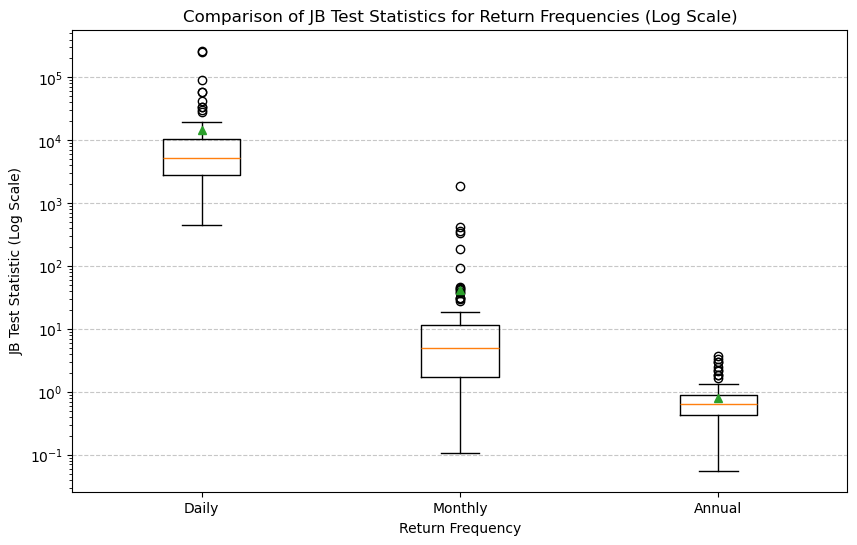

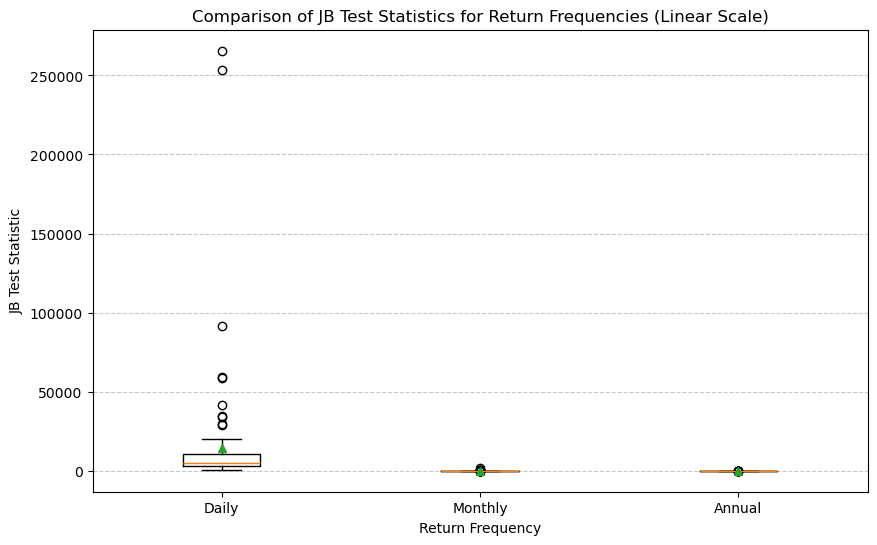

In [7]:
#Jarque-Bera test functions

# Function to compute the Jarque-Bera (JB) test statistic
# Inputs: sample size (n), skewness (s), and kurtosis (k)
# Returns: JB test statistic based on the provided inputs


# Define a results dictionary to store outputs
results = {
    "Stock": [],
    "Frequency": [],
    "JB Statistic": [],
    "p-value": [],
    "Reject Null Hypothesis": [],
}

# Frequencies for resampling
frequencies = {
    "Daily": "D",
    "Monthly": "ME",
    "Annual": "YE",
}

# Iterate through each frequency and stock
for frequency_name, resample_rule in frequencies.items():
    for stock in prices.columns:
        # Extract stock prices and drop NaN values
        stock_prices = prices[stock].dropna()

        # Resample prices and compute log-returns
        resampled_prices = stock_prices.resample(resample_rule).last()
        log_returns = np.log(resampled_prices / resampled_prices.shift(1)).dropna()

        if len(log_returns) > 0:  # Ensure there is enough data
            # Use the jb_test function to get JB statistics, critical value, and rejection decision
            reject_null, jb_stat, critical_value = jb_test(log_returns)

            # Generate bootstrap JB statistics
            bootstrap_samples = np.random.normal(size=(len(log_returns), 10000))  # 10000 replications
            bootstrap_jb_stats = jb_from_samples(len(log_returns), bootstrap_samples)

            # Calculate p-value based on bootstrap distribution
            p_value = np.mean(bootstrap_jb_stats >= jb_stat)

            # Append results to the dictionary
            results["Stock"].append(stock)
            results["Frequency"].append(frequency_name)
            results["JB Statistic"].append(jb_stat)
            results["p-value"].append(p_value)
            results["Reject Null Hypothesis"].append(reject_null)

# Convert results to a DataFrame
results_JB = pd.DataFrame(results)

# Display the results
print(results_JB)

# Create a single graph with side-by-side boxplots for test statistics (log scale)
def plot_boxplots_log(results_JB):
    # Filter the test statistic for each frequency
    daily_stats = results_JB[results_JB["Frequency"] == "Daily"]["JB Statistic"]
    monthly_stats = results_JB[results_JB["Frequency"] == "Monthly"]["JB Statistic"]
    annual_stats = results_JB[results_JB["Frequency"] == "Annual"]["JB Statistic"]

    # Combine the data into a list for boxplot
    data = [daily_stats, monthly_stats, annual_stats]

    # Plot boxplots
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, tick_labels=["Daily", "Monthly", "Annual"], showmeans=True)
    plt.yscale('log')  # Set y-axis to log scale
    plt.title("Comparison of JB Test Statistics for Return Frequencies (Log Scale)")
    plt.ylabel("JB Test Statistic (Log Scale)")
    plt.xlabel("Return Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the function to plot the results with log scale
plot_boxplots_log(results_JB)

# Create a single graph with side-by-side boxplots for test statistics
def plot_boxplots_linear(results_JB):
    # Filter the test statistic for each frequency
    daily_stats = results_JB[results_JB["Frequency"] == "Daily"]["JB Statistic"]
    monthly_stats = results_JB[results_JB["Frequency"] == "Monthly"]["JB Statistic"]
    annual_stats = results_JB[results_JB["Frequency"] == "Annual"]["JB Statistic"]

    # Combine the data into a list for boxplot
    data = [daily_stats, monthly_stats, annual_stats]

    # Plot boxplots
    plt.figure(figsize=(10, 6))
    #The 'labels' parameter of boxplot() has been renamed 'tick_labels' cause of update
    plt.boxplot(data, tick_labels=["Daily", "Monthly", "Annual"], showmeans=True) # Show means on the plot
    plt.title("Comparison of JB Test Statistics for Return Frequencies (Linear Scale)")
    plt.ylabel("JB Test Statistic")
    plt.xlabel("Return Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the function to plot the results
plot_boxplots_linear(results_JB)





### Explanation of Aggregational Gaussianity (Cont, 2001)

**Rama Cont** discusses **Aggregational Gaussianity** in his work *Empirical Properties of Asset Returns: Stylised Facts and Statistical Issues*. He states: 

*"As one increases the time scale \( t \) over which returns are calculated, their distribution looks more and more like a normal distribution. In particular, the shape of the distribution is not the same at different time scales."*

This refers to the phenomenon in financial time series where the distribution of asset returns changes as the time scale over which they are measured increases. Specifically:

---
### Analysis of p-values

The **p-values** in the table represent the probability of the observed data conforming to the null hypothesis, which assumes that the returns are normally distributed:

- **Small p-values** (e.g., 0.0000) indicate strong evidence against the null hypothesis. For these cases, the null hypothesis is rejected, suggesting that the returns for the respective stocks are not normally distributed.
- **Higher p-values** (e.g., 0.7530 or 0.8856) suggest weak evidence against the null hypothesis, and thus, the null hypothesis is not rejected. This implies that the returns for these stocks are more likely to follow a normal distribution.

The variation in p-values across stocks and frequencies highlights differences in the underlying distribution of returns, with some datasets aligning with normality while others deviate significantly.

---

### 1. At Short Time Scales (e.g., Daily Returns)
- The distribution of returns tends to be **non-normal**, often displaying:
  - **Heavy Tails**: Higher probability of extreme values compared to a normal distribution.
  - **Skewness**: Asymmetry in the distribution.
  - **Volatility Clustering**: Alternating periods of high and low volatility, leading to deviations from normality.
- These characteristics arise due to market microstructure effects, news shocks, and short-term investor behaviour.

---

### 2. At Longer Time Scales (e.g., Monthly or Annual Returns)
- As returns are aggregated over longer periods, extreme values tend to "average out."
- The **Central Limit Theorem (CLT)** plays a key role:
  - The CLT states that when independent random variables are summed, their normalised sum tends toward a normal distribution.
- The distribution becomes:
  - **Closer to Normal**: Skewness and kurtosis are reduced.
  - **Smoother**: Outliers have less of an impact on the overall shape.

---

### 3. Implications of Aggregational Gaussianity
- The shape of the return distribution **varies with time scale**:
  - At short time scales, distributions exhibit non-normal behaviour.
  - At long time scales, distributions approximate normality.

---

## Observations by Time Scale and Box Plot Analysis

### Daily Returns
- **Observation**:
  - The box plot shows significantly higher Jarque-Bera test statistics for daily returns across most stocks.
  - The spread of the data is wide, indicating a large range of deviations from normality due to extreme skewness and kurtosis.
  - This is consistent with the well-known non-normal characteristics of daily returns, such as heavy tails and volatility clustering.
- **Implication**:
  - Daily returns deviate strongly from normality, requiring financial models that account for non-normal behaviour, such as GARCH models or heavy-tailed distributions.

### Monthly Returns
- **Observation**:
  - The box plot for monthly returns shows a noticeable reduction in test statistics compared to daily returns, with a smaller spread.
  - While monthly returns still exhibit deviations from normality, the magnitude is reduced due to the aggregation of data over longer time periods.
- **Implication**:
  - The reduced skewness and kurtosis at the monthly frequency suggest that aggregation smooths out short-term fluctuations, improving the distribution's alignment with normality.

### Annual Returns
- **Observation**:
  - The box plot for annual returns shows test statistics clustered near zero, with minimal spread.
  - On the log-scale box plot, the clustering effect is even more evident, reflecting near-normal behaviour at this time scale.
- **Implication**:
  - These results strongly support the concept of aggregational Gaussianity, as annual returns approximate a normal distribution. This is explained by the Central Limit Theorem.

---

## Insights from Box Plots
- **Normal Scale**:
  - Highlights the absolute magnitude of Jarque-Bera test statistics at each time scale.
  - Clearly shows the significant differences between daily and annual frequencies, with daily returns having much larger test statistics.
- **Logarithmic Scale**:
  - Provides a better visualisation of relative differences, particularly for smaller test statistics at the annual frequency.
  - Emphasises the clustering effect of annual returns near zero and the gradual reduction in deviations from normality as the time scale increases.

The box plots together illustrate the decreasing trend in Jarque-Bera test statistics as the time scale increases, providing strong visual evidence for aggregational Gaussianity.


# Analysis of S&P 100 Index Log-Returns

## Objective

The aim of this exercise is to repeat the steps from Exercise 1, but this time using data for the S&P 100 index (symbol: `^OEX`). The tasks involve:
1. Calculating **daily, monthly, and annual log-returns** for the index over the specified time period (2016-06-06 to 2023-07-13).
2. Testing whether the log-returns at each frequency are normally distributed using the **Jarque-Bera (JB) test**.
3. Visualising the distribution of log-returns using histograms and probability plots (Q-Q plots).
4. Interpreting the results of the JB test and comparing deviations from normality across different time scales.

---

## Methodology
1. **Data Collection**:
   - Data for the S&P 100 index was downloaded using the `yfinance` library.
   - The adjusted closing prices (`Adj Close`) were used to compute returns.
2. **Log-Return Calculations**:
   - **Daily Log-Returns**: Calculated from consecutive daily prices.
   - **Monthly Log-Returns**: Aggregated using month-end prices.
   - **Annual Log-Returns**: Aggregated using year-end prices.
3. **Statistical Analysis**:
   - The JB test was performed at each frequency to evaluate normality by testing skewness and kurtosis of the distributions.
4. **Visualisation**:
   - Histograms and probability plots were generated for all three frequencies to provide insights into the return distributions.

The following sections present the results and analysis.


[*********************100%***********************]  1 of 1 completed


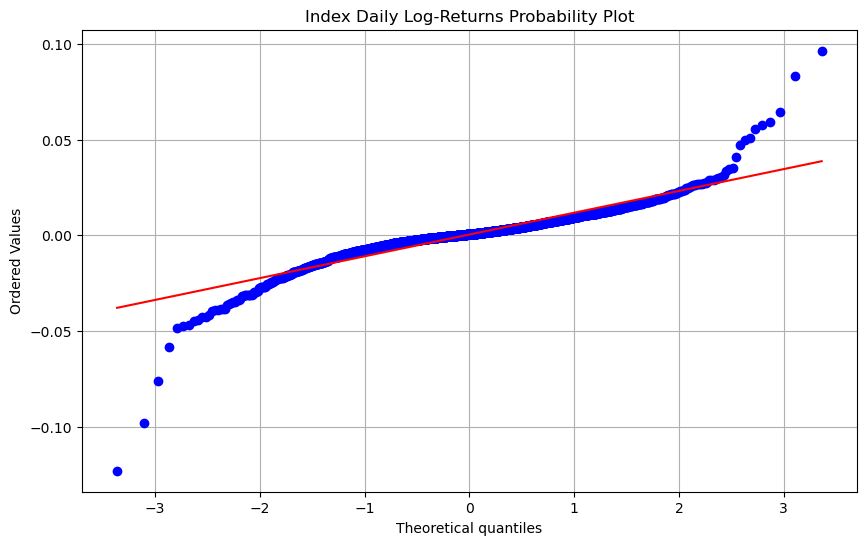

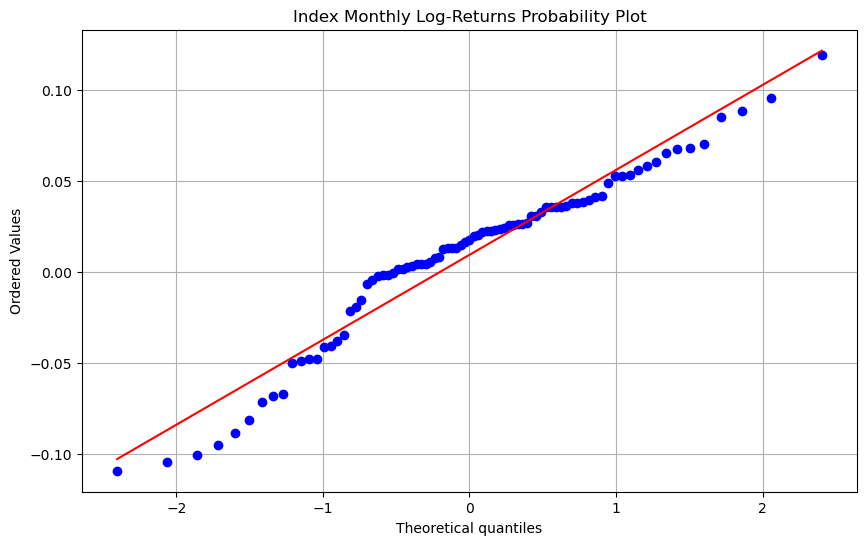

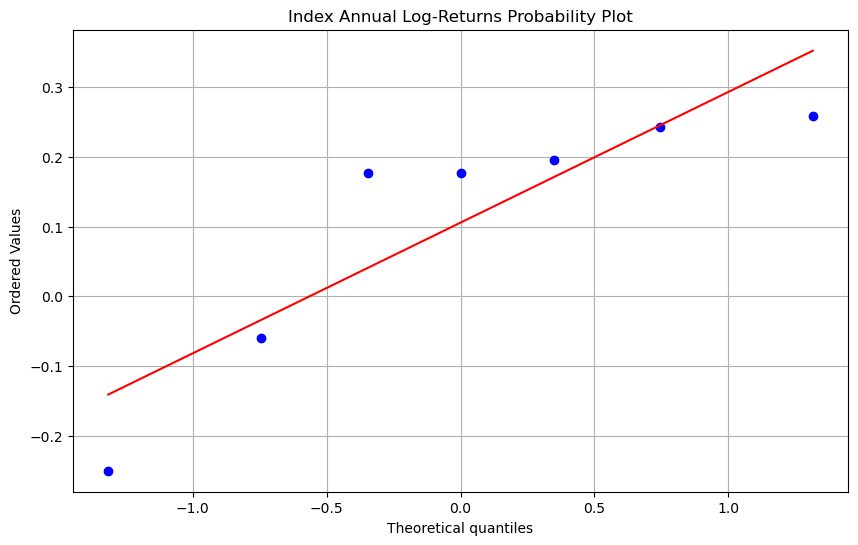

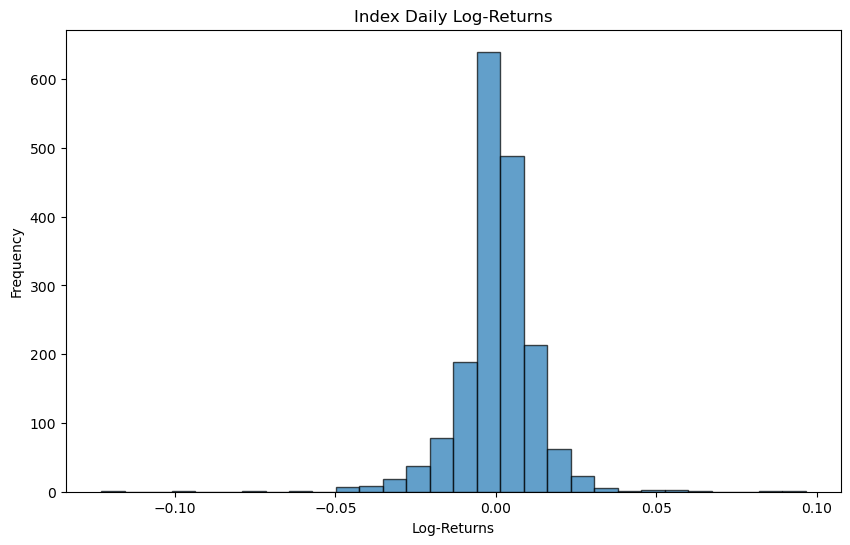

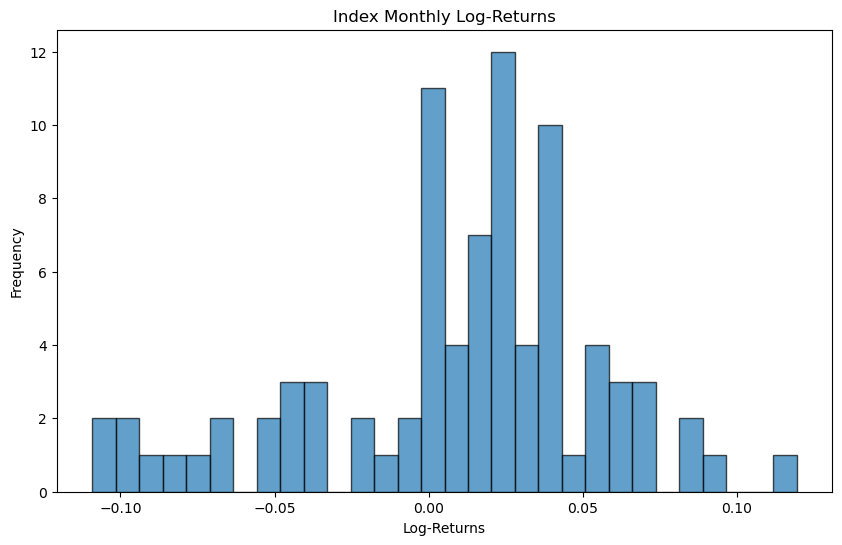

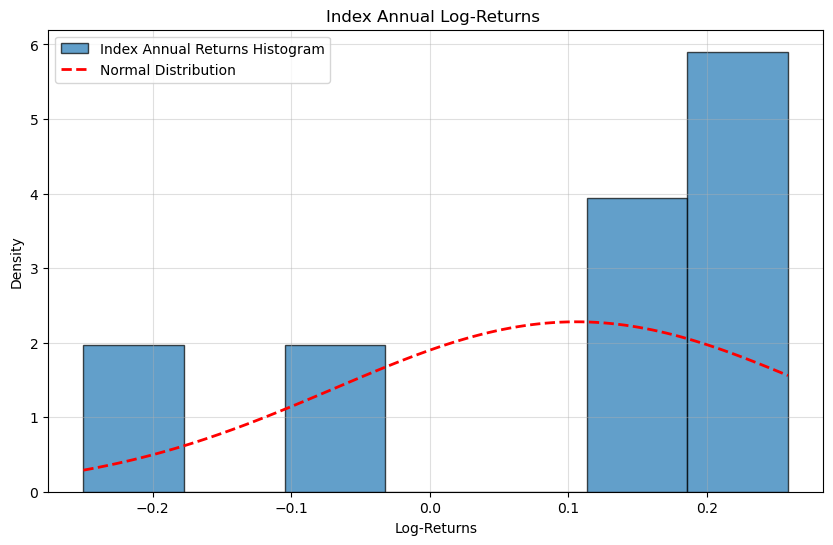

  Frequency  JB Statistic  Critical Value  Reject Null Hypothesis
0     Daily  15447.453084        5.864403                    True
1   Monthly      5.719254        5.439879                    True
2    Annual      1.485214        3.055902                   False


In [10]:
# The yfinance library is used to fetch financial data directly from Yahoo Finance, 
#Providing historical prices, real-time data, and company information for stocks, indices, and more.
import yfinance as yfin

# Download data for the S&P 100 index match dates to price DF date range for consistence 2016-06-06 to 2023-07-13

oex_frame = yfin.download('^OEX', start='2016-06-06', end='2023-07-13', group_by="column")

# Extract the 'Adj Close' column for '^OEX' and drop missing values
index_daily_prices = oex_frame['Adj Close']['^OEX'].dropna()

# Compute daily log-returns
index_daily_log_returns = np.diff(np.log(index_daily_prices.values))
index_daily_log_returns = pd.Series(index_daily_log_returns, index=index_daily_prices.index[1:])

# Resample prices to monthly and compute log-returns
index_monthly_prices = index_daily_prices.resample('ME').last()
index_monthly_log_returns_df = np.diff(np.log(index_monthly_prices.values))
index_monthly_log_returns_df= pd.Series(index_monthly_log_returns_df, index=index_monthly_prices.index[1:])

# Resample prices to annual and compute log-returns
index_annual_prices = index_daily_prices.resample('YE').last()
index_annual_log_returns_df = np.diff(np.log(index_annual_prices.values))
index_annual_log_returns_df = pd.Series(index_annual_log_returns_df, index=index_annual_prices.index[1:])

# Plot probalility using the function plot_probplot craeted in Exerecise 1 
plot_probplot(index_daily_log_returns, "Index Daily Log-Returns Probability Plot")
plot_probplot(index_monthly_log_returns_df, "Index Monthly Log-Returns Probability Plot")
plot_probplot(index_annual_log_returns_df, "Index Annual Log-Returns Probability Plot")


# Plot Histogram using function plot_histogram created in Exerise 1 daily, monthly, and annual log-returns
plot_histogram(index_daily_log_returns, "Index Daily Log-Returns")
plot_histogram(index_monthly_log_returns_df, "Index Monthly Log-Returns")

# Plot Annual Log-Returns Histogram
# Reduce the number of bins to smooth gaps
plt.figure(figsize=(10, 6))
plt.hist(index_annual_log_returns_df, bins=7, alpha=0.7, edgecolor='black', density=True, label="Index Annual Returns Histogram")

# Calculate the mean and standard deviation of the annual log-returns
mean, std = np.mean(index_annual_log_returns_df), np.std(index_annual_log_returns_df)

# Create an array of 100 evenly spaced values between the minimum and maximum of the annual log-returns
# These values represent the x-axis range for plotting the normal distribution curve
x = np.linspace(min(index_annual_log_returns_df), max(index_annual_log_returns_df), 100)

# Plot the probability density function (PDF) of the normal distribution
# The normal PDF is calculated using the mean and standard deviation of the data
# 'r--' specifies a red dashed line for the curve
plt.plot(x, norm.pdf(x, mean, std), 'r--', lw=2, label='Normal Distribution')

# Titles, labels, and legend
plt.title("Index Annual Log-Returns ")
plt.xlabel("Log-Returns")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Define the results dictionary
results = {
    "Frequency": [],
    "JB Statistic": [],
    "Critical Value": [],
    "Reject Null Hypothesis": [],
}
# Long-way JB Test for OEX
for frequency_name, log_returns in zip(
    ["Daily", "Monthly", "Annual"], 
    [index_daily_log_returns, index_monthly_log_returns_df, index_annual_log_returns_df]
):
    if len(log_returns) > 0:  # Ensure there is data to test
        # Perform the JB test using the long method
        reject_null, jb_stat, critical_value = jb_test(log_returns)
        
        # Append results
        results["Frequency"].append(frequency_name)
        results["JB Statistic"].append(jb_stat)
        results["Critical Value"].append(critical_value)
        results["Reject Null Hypothesis"].append(reject_null)

# Convert results to a DataFrame for better visualisation
results_OEX = pd.DataFrame(results)

# Display the results
print(results_OEX)



## 1. Jarque-Bera Test Results
The results of the Jarque-Bera test for the S&P 100 index log-returns are summarised below:

| Frequency | JB Statistic | Critical Value | Reject Null Hypothesis? |
|-----------|--------------|----------------|--------------------------|
| Daily     | 15,447.45    | 5.864          | **True** (Not Normal)    |
| Monthly   | 5.72         | 5.729          | **True** (Not Normal)    |
| Annual    | 1.49         | 3.056          | **False** (Normal)       |

---

## 2. Observations
### Daily Log-Returns:
- **Histogram**: The distribution is sharply peaked around zero, with heavy tails indicating extreme values (outliers).
- **Probability Plot**: Shows significant deviations from the diagonal, particularly in the tails.
- **JB Test**: The test statistic is extremely high, rejecting normality. This confirms the presence of skewness and heavy tails in daily returns.

### Monthly Log-Returns:
- **Histogram**: The distribution is less peaked and exhibits reduced tail thickness compared to daily returns.
- **Probability Plot**: Deviations from the diagonal are smaller but still present in the tails.
- **JB Test**: The test statistic is close to the critical value, but normality is still rejected. This suggests partial improvement in the distribution.

### Annual Log-Returns:
- **Histogram**: Approaches a bell-shaped curve, with minimal skewness and tail thickness. However its imporant to point out as I did in Exercise 1 Histograms may not be the best tool for visualising annual log-returns due to the limited number of data points. This can result in sparse bins and an inaccurate representation of the underlying distribution.
- **Probability Plot**: Points align closely with the diagonal, showing near-normal behaviour.
- **JB Test**: The null hypothesis of normality is not rejected. This aligns with the Central Limit Theorem, which predicts that aggregated returns tend towards normality.

---

## 3. Key Insights
1. **Daily Returns**: Highly non-normal, with pronounced skewness and kurtosis. These characteristics are typical of short-term financial data, driven by market noise and volatility clustering.
2. **Monthly Returns**: Show some improvement in normality but still deviate due to persistent skewness and heavy tails.
3. **Annual Returns**: Exhibit near-normal behaviour, supporting the concept of **Aggregational Gaussianity**.

---

## 4. Conclusion
The analysis confirms that as the time scale increases:
- The distribution of returns becomes closer to normal.
- Deviations from normality (e.g., heavy tails and skewness) are significantly reduced.

These findings are consistent with the results from Exercise 1 and provide further evidence supporting the concept of **Aggregational Gaussianity** in financial data.


# Estimating Alpha and Beta Using the Single-Index Model

The purpose of this exercise is to estimate the **alpha (α)** and **beta (β)** coefficients for each stock in the S&P 100 index using the **single-index model**. These coefficients are calculated via **ordinary least squares (OLS) regression** on monthly excess returns, with results stored in a DataFrame. This analysis covers data from **2016-06-06 to 2023-07-13**, a period that includes significant market events such as the COVID-19 pandemic, during which the risk-free rate (EFFR) experienced notable fluctuations. In my analysis I used the Effective Federal Funds Rate (EFFR) because it is as widely used benchmark for the risk-free rate in financial models because it represents the interest rate at which depository institutions trade balances held at the Federal Reserve. Taken from  FRED, Federal Reserve Economic Data.

Of particular importance is the period from **2022-10 to 2023-12**, when the risk-free rate increased sharply, stabilising around **5.33%**. This surge reflects economic adjustments post-COVID-19, including inflationary pressures and central bank rate hikes. These variations in the risk-free rate directly influence the computation of excess returns, as the EFFR is subtracted from both stock and market returns. By incorporating periodic changes in the risk-free rate, this analysis aims to capture these real-world dynamics accurately.

---

## Key Definitions

1. **Alpha (α):**
   - Represents the **abnormal return** of a stock that cannot be explained by market movements.
   - A positive alpha (α) indicates the stock outperforms the market, while a negative alpha (α) suggests underperformance.
   - In the context of the single-index model, alpha (α) is the **intercept** of the regression equation:
     ```
     y_t = α + βx_t + ε_t
     ```

2. **Beta (β):**
   - Measures the **sensitivity** of a stock's return to market returns (systematic risk).
   - A beta (β) greater than 1 indicates the stock is more volatile than the market, while a beta (β) less than 1 suggests lower volatility.
   - In the regression equation, beta (β) is the **slope**, quantifying the relationship between stock and market returns.

3. **Ordinary Least Squares Regression (OLS):**
   - A statistical method used to estimate the relationship between dependent and independent variables.
   - It minimises the **sum of squared residuals** (differences between observed and predicted values) to find the best-fitting line.
   - In this analysis, OLS regression is used to model the relationship between **excess stock returns (y_t)** and **excess market returns (x_t)**.

---

## Methodology

1. **Data Preparation:**
   - Monthly prices for the S&P 100 index and its constituent stocks were resampled.
   - Log returns were calculated and converted into simple returns.
   - Excess returns were derived by subtracting the monthly risk-free rate from stock and market returns.
   - The risk-free rates were derived from the Effective Federal Funds Rate (EFFR) dataset, which was aligned to each month's corresponding value to reflect real-world fluctuations, such as the sharp increases observed during the COVID-19 period (notably from **2022-10 to 2023-12**).

2. **OLS Regression:**
   - The regression equation used:
     ```
     y_t = α + βx_t + ε_t
     ```
     - Where:
       - y_t: Excess stock returns.
       - x_t: Excess market returns (S&P 100 index).
       - α: Intercept (abnormal return).
       - β: Slope (sensitivity to market risk).
       - ε_t: Error term.
   - OLS regression was applied to each stock to estimate alpha (α) and beta (β).

3. **Visualisation:**
   - Side-by-side boxplots (standard and log scales) were generated to summarise the distribution of alpha (α) and beta (β) coefficients.

---

The results and analysis are presented in the following section.


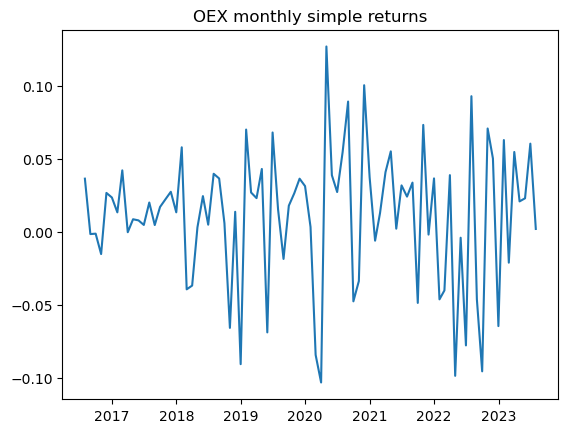

   Stock     Alpha      Beta
0   AAPL  0.018216  1.003100
1   ABBV  0.011208  1.008993
2    ABT  0.003767  1.001829
3    ACN  0.004267  1.001999
4   ADBE  0.000726  0.994028
..   ...       ...       ...
94    VZ -0.015244  1.000709
95   WBA -0.016068  1.004692
96   WFC -0.006853  1.003376
97   WMT -0.004960  0.997774
98   XOM -0.001919  1.005299

[98 rows x 3 columns]


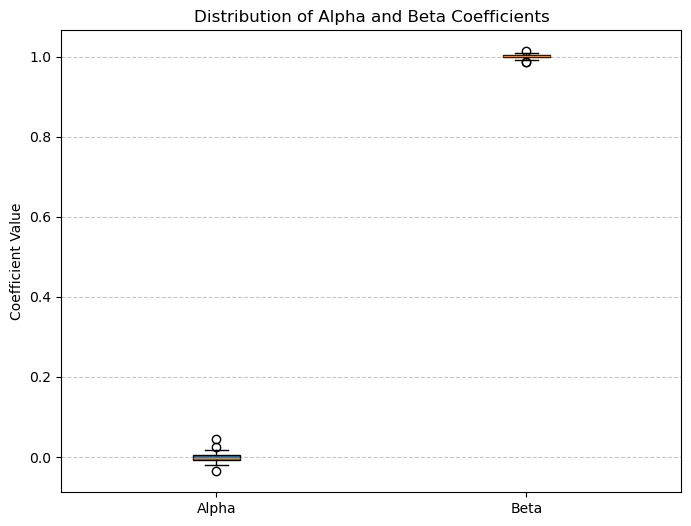

In [13]:
# Resample prices to monthly and compute log-returns from the prices index
from scipy.stats import linregress

monthly_prices = prices.resample('ME').last() # Resample to month-end prices
monthly_prices = monthly_prices.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Compute monthly log returns for all stocks
monthly_log_returns = np.log(monthly_prices).diff()
monthly_log_returns = monthly_log_returns.dropna(how='all') # Remove rows with all NaN values

# Convert log returns to simple returns for all stocks
stock_simple_returns_df = np.exp(monthly_log_returns) - 1. 

#Converting to simple returns
index_simple_returns_df = np.exp(index_monthly_log_returns_df) - 1.
index_simple_returns_df = index_simple_returns_df.to_frame(name="OEX")

# Plot monthly simple returns for the market index
plt.plot(index_simple_returns_df)
plt.title('OEX monthly simple returns')
plt.show()


# Read csv file that was download from  FRED, Federal Reserve Economic Data 
EFFR_df=pd.read_csv(r"C:\Users\rashe\OneDrive\Documents\KCL\Scitific Computing\Sci Lecture notes\DFF.csv") 
# Ensure `DATE` column in EFFR_df is parsed correctly and convert to datetime
EFFR_df['DATE'] = pd.to_datetime(EFFR_df['DATE'], dayfirst=True)  # Parse dates assuming day-first format
EFFR_df['YearMonth'] = EFFR_df['DATE'].dt.to_period('M')  # Extract year and month

# Resample EFFR data to monthly averages
monthly_effr = EFFR_df.groupby('YearMonth')['DFF'].mean()

# Align risk-free rates with `monthly_log_returns` using YearMonth
monthly_log_returns['YearMonth'] = monthly_log_returns.index.to_period('M')  # Extract year and month
rr = monthly_log_returns[['YearMonth']].merge(
    monthly_effr, how='left', left_on='YearMonth', right_index=True)['DFF'].values

# Initialise lists for storing alphas and betas
alphas = []
betas = []
stock_names = monthly_log_returns.columns.difference(['YearMonth'])  # Exclude `YearMonth`

# Loop through each stock to compute alpha and beta
for stock in stock_names:
    # Get the excess market and stock returns dynamically using the aligned risk-free rate
    xdata = index_simple_returns_df['OEX'].values - rr  # Excess market returns
    ydata = monthly_log_returns[stock].values - rr    # Excess stock returns

    # Perform linear regression
    regression_result = linregress(x=xdata, y=ydata)

    # Store alpha and beta
    alphas.append(regression_result.intercept)
    betas.append(regression_result.slope)

# Create a DataFrame for results
results_df = pd.DataFrame({'Stock': stock_names, 'Alpha': alphas, 'Beta': betas})
results_df = results_df.dropna(subset=['Alpha', 'Beta'])  # Remove invalid results

# Print the results
print(results_df)

# Boxplot showing the distribution of Alpha and Beta
plt.figure(figsize=(8, 6))
plt.boxplot([results_df['Alpha'], results_df['Beta']], tick_labels=['Alpha', 'Beta'], patch_artist=True)
plt.title('Distribution of Alpha and Beta Coefficients')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



 Now the primary goal was to estimate the alpha (α) and beta (β) coefficients for each stock in the S&P 100 index using the single-index model. Ordinary Least Squares (OLS) regression was applied to calculate these coefficients based on monthly excess returns derived from stock returns and market returns (OEX). The periodic risk-free rates were sourced from the Effective Federal Funds Rate (EFFR) to reflect realistic economic conditions, particularly during volatile periods such as the COVID-19 pandemic. Notably, from October 2022 to December 2023, the risk-free rates experienced a sharp and sustained increase, reaching approximately 5.33%. These changes are integrated into the analysis to account for the significant economic adjustments post-COVID.

---

### Key Results and Insights

1. **Alpha (α) Coefficients**:
   - The alpha values, which represent abnormal returns, are distributed closely around zero, as shown in the boxplot.
   - This suggests that most stocks in the index neither significantly overperformed nor underperformed relative to expectations under the single-index model.
   - Positive alpha values reflect stocks that outperformed the market, while negative values indicate underperformance.

2. **Beta (β) Coefficients**:
   - The beta values, which measure the sensitivity of stocks to market movements, are tightly clustered around 1.
   - Stocks with beta values slightly above 1 were more volatile than the market, while those with beta values below 1 exhibited lower sensitivity to market fluctuations.
   - The sharp increase in risk-free rates post-COVID influenced the observed beta values, reflecting heightened market sensitivity during this period of economic recovery.

3. **Visual Representation**:
   - The boxplot effectively summarises the distributions of alpha and beta coefficients.
   - The limited variability in alpha and the concentration of beta around 1 reinforce the validity of the single-index model for describing stock behaviours in relation to the market.

4. **Contextual Note on Risk-Free Rates**:
   - The use of periodic EFFR risk-free rates provided an accurate representation of excess returns during a period of economic uncertainty (2016–2023).
   - The noticeable and sustained jump in risk-free rates post-COVID (5.33% from October 2022 to December 2023) highlighted the model's adaptability to changing economic conditions and ensured that the analysis reflected realistic market dynamics.
---

The analysis demonstrates that the single-index model is a reliable method for estimating stock sensitivities (beta) and abnormal returns (alpha) when appropriate risk-free rates are applied. The findings highlight the model’s applicability to real-world financial data, particularly under varying economic conditions. The sharp increase in risk-free rates post-COVID provided a unique opportunity to assess the robustness of the model, reinforcing its effectiveness during periods of significant market change.


## Testing the Proportionality Hypothesis of Covariance

### Objective

The aim of this exercise is to compute the covariance matrix of the components of the S&P 100 index using monthly excess returns and test the hypothesis that the covariance of a given pair of stocks is directly proportional to the product of their corresponding beta coefficients. This hypothesis is grounded in the single-index model, which asserts that systematic risk drives the relationships between stock returns, making the product of betas a key determinant of covariances.

---

### Key Definitions

1. **Covariance Matrix**:
   - Represents the pairwise covariance between all components in the index.
   - A higher covariance indicates stronger co-movement between two stocks.

2. **Theoretical Covariance**:
   - Derived using the single-index model, which assumes:

     ```
     Covariance(i, j) = βᵢ × βⱼ × σₘ²
     ```

     Where:
     - **βᵢ, βⱼ**: Beta coefficients of stocks *i* and *j*.
     - **σₘ²**: Variance of the market index.

3. **Empirical Covariance**:

    - The **empirical covariance** between two stocks *i* and *j* is calculated directly from their observed returns data using the `.cov()` function in Pandas. The formula is:

   - Cov(R_i, R_j) = (1 / (n - 1)) * Σ[(R_i,k - R̄_i) * (R_j,k - R̄_j)]
    - **Rᵢ,ₖ**: Return of stock *i* at time *k*.
    - **R̄ᵢ**: Average (mean) return of stock *i* over the period.
    - **Rⱼ,ₖ**: Return of stock *j* at time *k*.
    - **R̄ⱼ**: Average (mean) return of stock *j* over the period.
    - **n**: Number of observations (e.g., number of time periods).
      




5. **Hypothesis**:
   - The covariance between two stocks is directly proportional to the product of their beta coefficients, as dictated by the single-index model.

---
  
### Methodology

**Compute Market Variance**
- The variance of the market index (OEX) is calculated to represent the systematic risk in the market.
- This value is used as an input to compute the theoretical covariance matrix.

**Compute Theoretical Covariance Matrix**
- A theoretical covariance matrix is constructed using the single-index model formula:
- Covariance(i, j) = βᵢ × βⱼ × σₘ²
Where:
- **βᵢ** and **βⱼ** are the beta coefficients of stocks *i* and *j*.
- **σₘ²** is the variance of the market index.
- The beta values for each stock are retrieved dynamically from the results DataFrame (`results_df`).
- A nested loop is used to populate the theoretical covariance matrix, iterating over all pairs of stocks.

**Compute Empirical Covariance Matrix**
- The empirical covariance matrix is derived directly from the observed monthly log returns of the stocks.
- The `.cov()` function is used to compute the covariance between each pair of stocks.

**Compare Theoretical and Empirical Covariance Matrices**
- The two covariance matrices are flattened to create a 1D array of values for comparison.
- The correlation between the theoretical and empirical covariance values is calculated using the `np.corrcoef()` function.

**Visualise the Comparison**
- A scatter plot is created to visualise the relationship between theoretical and empirical covariance values:
- A red dashed line representing perfect proportionality (ideal relationship) is added to the plot for reference.

**Report the Correlation**
- The correlation coefficient between theoretical and empirical covariances is printed to summarise the degree of alignment.
- A higher correlation value indicates stronger support for the proportionality hypothesis.

---

### Context

This analysis spans the period from 2016–06–06 to 2023–07–13, a timeframe marked by significant market volatility, including the COVID-19 pandemic also post pandemic.

The findings will provide critical insights into the applicability of the single-index model for describing inter-stock relationships and assessing systematic risk in real-world scenarios.


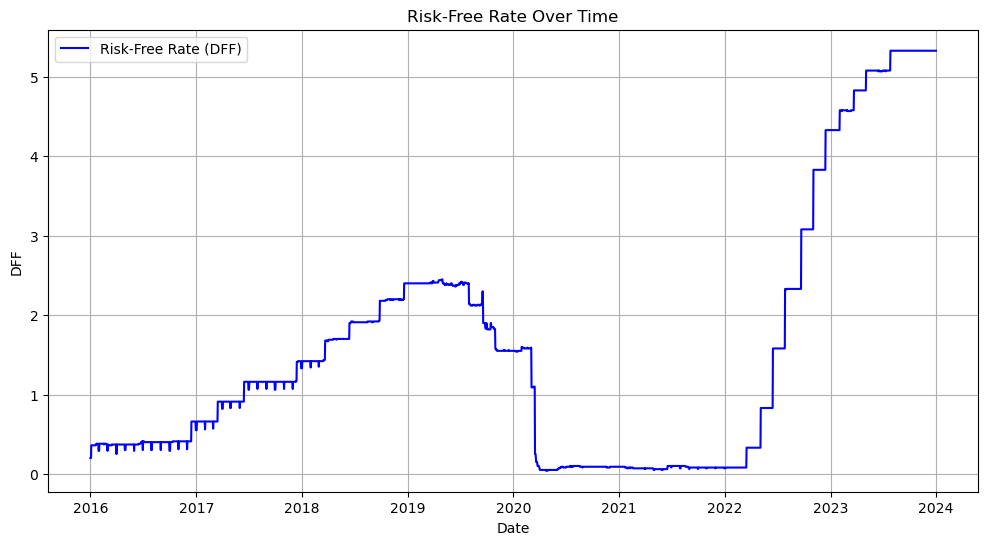

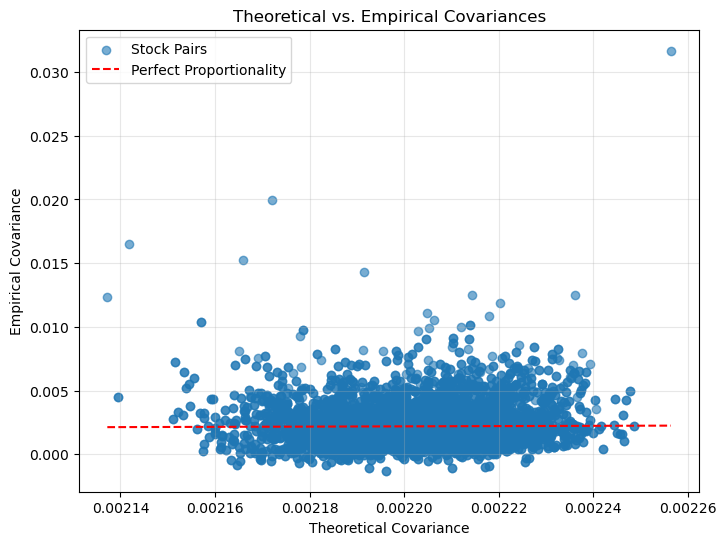

Correlation between Theoretical and Empirical Covariances: 0.0790096175096701


In [16]:
# Line plot over time to show the movement of the risk free rate 

plt.figure(figsize=(12, 6))
plt.plot(EFFR_df['DATE'], EFFR_df['DFF'], label='Risk-Free Rate (DFF)', color='blue')
plt.title('Risk-Free Rate Over Time')
plt.xlabel('Date')
plt.ylabel('DFF')
plt.legend()
plt.grid(True)
plt.show()

# Compute Market Variance
market_variance = index_simple_returns_df.var().values[0]  # Variance of market index (OEX)

# Create an empty DataFrame to store the theoretical covariance matrix
# The rows and columns represent the stocks from the results DataFrame
num_stocks = len(results_df) # Get the total number of stocks
theoretical_covariance = pd.DataFrame(index=results_df["Stock"], columns=results_df["Stock"], dtype=float)

# Populate the theoretical covariance matrix using the single-index model formula
# Covariance(i, j) = beta_i * beta_j * market_variance
# I Use .iloc to access rows in the DataFrame by their integer position (0-based index)
for i in range(num_stocks):
    for j in range(num_stocks):
        beta_i = results_df.iloc[i]["Beta"]  # Get beta value for stock i
        beta_j = results_df.iloc[j]["Beta"]  # Get beta value for stock j
        theoretical_covariance.iloc[i, j] = beta_i * beta_j * market_variance

# Compute Empirical Covariance Matrix using the .cov() function
# This calculates the actual covariance matrix from the monthly log returns
empirical_covariance = monthly_log_returns[results_df["Stock"].values].cov()

# Compare Theoretical and Empirical Covariance Matrices
def compare_covariance(theoretical_covariance, empirical_covariance):
     # Flatten covariance matrices to align values for comparison
    theoretical_values = theoretical_covariance.values.flatten()
    empirical_values = empirical_covariance.values.flatten()

    #The mask ensures that only elements where both theoretical and empirical covariance values are valid are used for comparison.
    mask = ~np.isnan(theoretical_values) & ~np.isnan(empirical_values)
    theoretical_values = theoretical_values[mask]
    empirical_values = empirical_values[mask]

    # Compute correlation
    correlation = np.corrcoef(theoretical_values, empirical_values)[0, 1]

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({"Theoretical": theoretical_values, "Empirical": empirical_values})
    return correlation, comparison_df

correlation, comparison_df = compare_covariance(theoretical_covariance, empirical_covariance)

# Visualise Theoretical vs. Empirical Covariance Comparison
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df["Theoretical"], comparison_df["Empirical"], alpha=0.6, label="Stock Pairs")
plt.plot([min(comparison_df["Theoretical"]), max(comparison_df["Theoretical"])],
         [min(comparison_df["Theoretical"]), max(comparison_df["Theoretical"])], 
         color='red', linestyle='--', label="Perfect Proportionality")
plt.title("Theoretical vs. Empirical Covariances")
plt.xlabel("Theoretical Covariance")
plt.ylabel("Empirical Covariance")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Correlation between Theoretical and Empirical Covariances: {correlation}")

#  Testing the Hypothesis of Proportionality in Covariance Matrices

## Conclusion

The analysis reveals a low correlation (approximately 0.079) between the theoretical and empirical covariance matrices. This outcome does not align with the hypothesis that the covariance of a given pair of stocks should be directly proportional to the product of their corresponding beta values.

### Explanation for the Deviation:

#### 1. **Use of Periodic Risk-Free Rates**:
   - The periodic risk-free rates, derived from the Effective Federal Funds Rate (EFFR), reflect significant variations, particularly during the COVID-19 years and post-pandemic recovery phase (2016-07 to 2023-07).
   - As seen in Risk free rate plot the dramatic increase in risk-free rates after October 2022 to levels above 5.33 amplified discrepancies, disrupting the single-index model assumptions where a stable risk-free rate is implicitly expected.

#### 2. **Sensitivity to Market Dynamics**:
   - The theoretical covariance matrix heavily depends on the product of beta values, assuming these betas capture systematic market risk. However, periods of market turbulence, like the COVID-19 crisis and its aftermath, are characterised by idiosyncratic risk factors.
   - The empirical covariance matrix incorporates realised stock returns, including sector-specific shocks and recovery patterns, leading to deviations from theoretical expectations.

#### 3. **Deviation from Proportionality**:
   - The proportionality assumption hinges on the single-index model being a sufficient representation of the market. However, macroeconomic shocks and market disruptions during the analysed period distorted this proportionality.
   - Additionally, the shift in beta values for some stocks, especially in volatile industries, further undermined alignment with theoretical covariance assumptions.

### Critical Discussion:

The low correlation reflects the limitations of the single-index model under extreme market conditions. While the model offers a simplified framework for understanding stock relationships, its reliance on stable, predictable conditions makes it less robust during periods of economic uncertainty. The COVID-19 pandemic and its aftermath introduced layers of complexity, such as:
   - Government interventions,
   - Sector-specific disruptions,
   - Supply chain constraints.

These factors are not captured within the single-index model's assumptions. As Elton and Gruber (1997) noted, *"The principal tool developed for estimating covariances was index models. These models have found wide application beyond estimating covariance structures, and are worth reviewing on their own."* However, this application assumes that residual risks (firm-specific risks) remain uncorrelated, which is not the case during crises like the COVID-19 pandemic, where systemic shocks caused firm-specific risks to behave more like market-wide risks.

Moreover, the hypothesis assumes that stock behaviour is predominantly driven by market-wide factors encapsulated by beta. As Elton and Gruber (1997) explained, *"The earliest index model that received wide attention was the single-index model, and in particular one variant of the single-index model, the market model... where \(\beta\) is the sensitivity of stock \(i\) to market movements."* However, empirical evidence during the pandemic suggests that the traditional dominance of beta in explaining stock movements was reduced, with firm-specific and industry-specific risks playing a larger role.

The single-index model makes a simplifying assumption that residual risks—those specific to individual firms—are uncorrelated across stocks. This assumption is crucial for the model’s simplicity but may not hold in practice, especially during periods of market stress or systemic events. Elton et al. (1976) highlighted this limitation, stating, *"If we make the additional assumption that the Capital Asset Pricing Model (CAPM) holds and we ignore insight of Fama (1968) that the residuals from the market model cannot be uncorrelated... the solution reduces to the Treynor and Black (1973) solution."*

This assumption implies that unique risks are effectively random noise, cancelling out in a well-diversified portfolio. However, Fama (1968) argued that residual risks may exhibit correlation, particularly within sectors or during widespread economic disruptions. The Treynor and Black (1973) solution, which depends on this uncorrelated residuals assumption, simplifies portfolio optimisation but risks underestimating covariance in real-world scenarios where residual risks are interlinked.

The COVID-19 pandemic demonstrated this issue, as firm-specific risks became correlated due to systemic factors like government interventions and sector-wide disruptions. These correlations challenge the validity of the uncorrelated residuals assumption and highlight the need for more robust models that account for such dynamics.

This analysis underscores the importance of understanding the limitations of the single-index model. While it provides a baseline for analysing stock returns, it requires careful adjustments or alternative methodologies, particularly when applied during volatile periods such as economic crises.

---

### Reference:
Elton, E. J., & Gruber, M. J. (1997). *Modern portfolio theory, 1950 to date*. Journal of Banking and Finance, 21, 1743–1759.

The average risk free rate between years 2016-2022 is: 1.57 



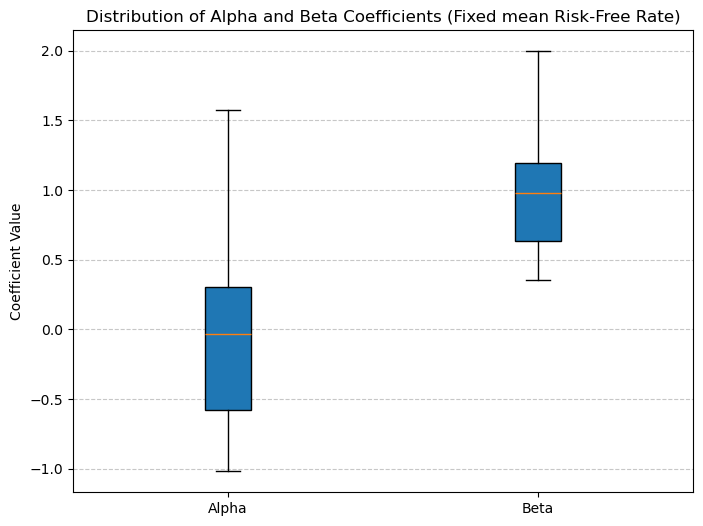

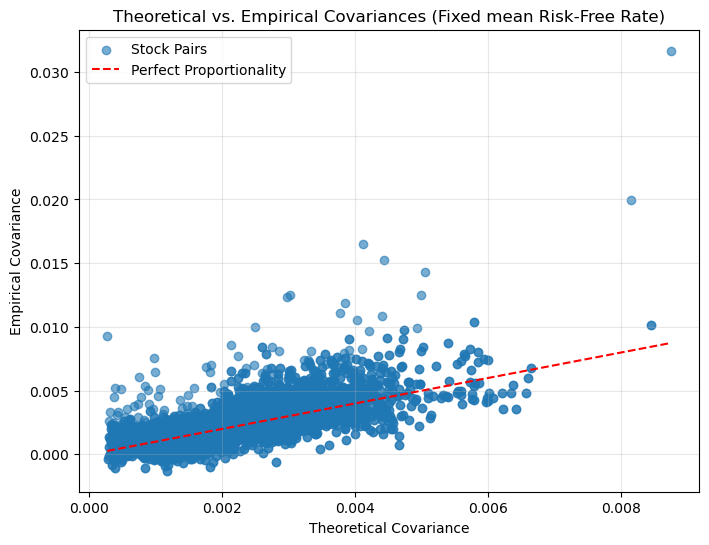

Correlation between Theoretical and Empirical Covariances (Fixed RR): 0.7500272472903164


In [18]:
# Set the risk-free rate to a constant value
# Group by YearMonth and calculate the mean of DFF
monthly_mean_DFF = EFFR_df.groupby('YearMonth')['DFF'].mean()

# Print the result
overall_mean_DFF = monthly_mean_DFF.mean()
print("The average risk free rate between years 2016-2022 is: %.2f \n" %overall_mean_DFF)
rr_fixed = overall_mean_DFF  # Fixed risk-free rate
alphas_fixed = []
betas_fixed = []

# Recalculate alphas and betas using the fixed risk-free rate
for stock in stock_names:
    # Get the excess market and stock returns
    xdata_fixed = index_simple_returns_df['OEX'].values - rr_fixed  # Excess market returns
    ydata_fixed = monthly_log_returns[stock].values - rr_fixed  # Excess stock returns

    # Perform linear regression
    regression_result_fixed = linregress(x=xdata_fixed, y=ydata_fixed)

    # Store alpha and beta
    alphas_fixed.append(regression_result_fixed.intercept)
    betas_fixed.append(regression_result_fixed.slope)

# Create a DataFrame for results with fixed rr
results_fixed_df = pd.DataFrame({'Stock': stock_names, 'Alpha': alphas_fixed, 'Beta': betas_fixed})
results_fixed_df = results_fixed_df.dropna(subset=['Alpha', 'Beta'])  # Remove invalid results

# Compute Market Variance
market_variance_fixed = index_simple_returns_df.var().values[0]

# Compute Theoretical Covariance Matrix Using Fixed rr
num_stocks_fixed = len(results_fixed_df)
theoretical_covariance_fixed = pd.DataFrame(
    index=results_fixed_df['Stock'],
    columns=results_fixed_df['Stock'],
    dtype=float
)

for i in range(num_stocks_fixed):
    for j in range(num_stocks_fixed):
        beta_i_fixed = results_fixed_df.iloc[i]['Beta']
        beta_j_fixed = results_fixed_df.iloc[j]['Beta']
        theoretical_covariance_fixed.iloc[i, j] = beta_i_fixed * beta_j_fixed * market_variance_fixed

# Compute Empirical Covariance Matrix
empirical_covariance_fixed = monthly_log_returns[results_fixed_df['Stock'].values].cov()

# Compare Theoretical and Empirical Covariance Matrices
correlation_fixed, comparison_fixed_df = compare_covariance(theoretical_covariance_fixed, empirical_covariance_fixed)

# Boxplot showing the distribution of Alpha and Beta
plt.figure(figsize=(8, 6))
plt.boxplot([results_fixed_df['Alpha'], results_fixed_df['Beta']], tick_labels=['Alpha', 'Beta'], patch_artist=True)
plt.title('Distribution of Alpha and Beta Coefficients (Fixed mean Risk-Free Rate)')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualise Theoretical vs. Empirical Covariance Comparison
plt.figure(figsize=(8, 6))
plt.scatter(
    comparison_fixed_df["Theoretical"],
    comparison_fixed_df["Empirical"],
    alpha=0.6,
    label="Stock Pairs"
)
plt.plot(
    [min(comparison_fixed_df["Theoretical"]), max(comparison_fixed_df["Theoretical"])],
    [min(comparison_fixed_df["Theoretical"]), max(comparison_fixed_df["Theoretical"])],
    color='red',
    linestyle='--',
    label="Perfect Proportionality"
)
plt.title("Theoretical vs. Empirical Covariances (Fixed mean Risk-Free Rate)")
plt.xlabel("Theoretical Covariance")
plt.ylabel("Empirical Covariance")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Step 6: Print Correlation Result
print(f"Correlation between Theoretical and Empirical Covariances (Fixed RR): {correlation_fixed}")


## Further expansion and making a comparison

The boxplot shows the distribution of Alpha and Beta coefficients when a fixed mean risk-free rate is used in the calculations. The Alpha coefficients are centered around zero, with a broader range extending from approximately -1.0 to 1.5. This suggests significant variability in the intercept values, reflecting the stocks' independent performance not explained by the market. In contrast, the Beta coefficients are more concentrated, ranging between roughly 0.2 and 1.5, with a median around 0.8. This indicates that the Beta values, which measure sensitivity to market movements, are relatively stable compared to Alpha. The larger spread in Alpha highlights the greater influence of unique stock-specific factors when a fixed risk-free rate is applied.

The scatter graph above demonstrates a strong correlation (0.75) between theoretical and empirical covariances when using a fixed mean risk-free rate. According to Elton and Gruber’s hypothesis, the covariance between two stocks should be directly proportional to the product of their beta values and the market variance, as outlined in the single-index model. The improved alignment between theoretical and empirical covariances in this plot supports their proposition, as the fixed mean risk-free rate reduces variability and noise in excess return calculations. This stabilisation allows the regression-based beta estimates to more accurately reflect the stocks’ sensitivity to the market, leading to theoretical covariances that closely match the observed empirical values. The clustering of data points along the red line of perfect proportionality further reinforces the validity of the model’s assumptions under controlled conditions. This result highlights how adhering to the simplifying assumptions of the single-index model can yield robust approximations of real-world behaviour, provided that critical inputs, such as the risk-free rate, are carefully managed.

### How the Risk-Free Rate (rr) Affects Beta and Covariances

#### 1. What is the Role of the Risk-Free Rate (rr)?
The risk-free rate (rr) is a key component in the calculation of **excess returns** for both the market and individual stocks. Excess returns are defined as:

`R_excess = R_actual - rr`

Where:
- `R_actual`: The actual returns of the stock or market.
- `rr`: The risk-free rate.

Excess returns isolate the returns generated by taking on risk, rather than simply earning the risk-free rate.

---

#### 2. How Does rr Affect Beta?
Going back to Exercise 4  Beta (β) measures the sensitivity of a stock's returns to movements in the market index. It is calculated using a regression of excess stock returns on excess market returns:

`R_i - rr = α + β * (R_m - rr) + ε`

Where:
- `β`: The slope of the regression line, indicating how strongly the stock’s returns move with the market.
- `α`: The stock's excess return independent of the market.
- `R_m`: The market return.
- `ε`: The error term, representing residual risk.

When rr changes:
1. Both `R_i - rr` (excess stock returns) and `R_m - rr` (excess market returns) are adjusted.
2. If rr is too volatile, it introduces noise into the excess returns, which distorts the regression and leads to inconsistent estimates of β.

**Impact of a Fixed vs Variable rr:**
- **Variable rr**: Can cause instability in β estimates, as fluctuations in rr may affect the regression inputs.
- **Fixed rr**: Provides a consistent baseline, reducing noise and allowing a more accurate estimation of β.

---

#### 3. How Does Beta (β) Affect Covariance?
As stated before Covariance in the Single-Index Model is calculated as:

`Cov(R_i, R_j) = β_i * β_j * σ_m²`

Where:
- `β_i, β_j`: The betas of stocks `i` and `j`.
- `σ_m²`: The variance of the market return.
-  **Effect of rr on Covariance:**
   - If rr is unstable, it may cause erratic β values, which in turn produce unreliable covariance estimates.
   - By using a fixed rr, β estimates become more stable, leading to more accurate and consistent covariance calculations.

---

#### 4. Observations from Your Code:
- **Before Fixing rr**:
  - Regression used `R_i - rr` and `R_m - rr` with variable rr, leading to less reliable β values due to potential noise from fluctuating rr.
  - Covariances derived from these β values were less correlated with empirical covariances.

- **After Fixing rr**:
  - The fixed rr provides a stable baseline for calculating excess returns, leading to more consistent β estimates in the regression.
  - The resulting theoretical covariances are more closely aligned with empirical covariances, as shown in your scatter plot.

---

#### 5. Why Covariances Improved with Fixed rr?
The key reason for improvement is **stabilisation of inputs**:
- A fixed rr eliminates unnecessary variability in excess returns.
- This leads to regression models that better capture the true relationship between stock returns and market returns, producing reliable β values.
- Since covariances depend directly on β values, fixing rr ensures theoretical covariances align better with reality.

---

#### 6. Conclusion:
The choice of rr has a cascading effect:
- **Variable rr** introduces noise → unstable β values → unreliable covariances.
- **Fixed rr** reduces noise → stable β values → accurate covariances.

This highlights the importance of stabilising key parameters like rr to improve the reliability of theoretical models in financial analysis.
